In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther233_93.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther37_110.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther228_91.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther92_145.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther40_113.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther196_69.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther159_45.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther129_24.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther182_63.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Ale

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Path to Dataset

In [4]:
data_dir = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset'

In [5]:
IMG_SIZE = 100 
BATCH_SIZE = 32

Image Data Generator

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 14071 images belonging to 105 classes.
Found 3463 images belonging to 105 classes.


Model Creation

In [8]:
num_classes = len(train_data.class_indices)  

model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Callbacks

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

Model Training

In [11]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


440/440 ━━━━━━━━━━━━━━━━━━━━ 153s 336ms/step - accuracy: 0.0121 - loss: 5.3385 - val_accuracy: 0.0234 - val_loss: 4.6246 - learning_rate: 0.0010
Epoch 2/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 133s 300ms/step - accuracy: 0.0180 - loss: 4.8062 - val_accuracy: 0.0292 - val_loss: 4.5337 - learning_rate: 0.0010
Epoch 3/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 134s 301ms/step - accuracy: 0.0231 - loss: 4.6469 - val_accuracy: 0.0321 - val_loss: 4.4884 - learning_rate: 0.0010
Epoch 4/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 134s 301ms/step - accuracy: 0.0268 - loss: 4.5698 - val_accuracy: 0.0338 - val_loss: 4.4535 - learning_rate: 0.0010
Epoch 5/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 133s 299ms/step - accuracy: 0.0281 - loss: 4.5082 - val_accuracy: 0.0361 - val_loss: 4.4338 - learning_rate: 0.0010
Epoch 6/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 133s 298ms/step - accuracy: 0.0327 - loss: 4.4596 - val_accuracy: 0.0384 - val_loss: 4.4110 - learning_rate: 0.0010
Epoch 7/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 135s 305ms/step - accuracy: 0

Model Evaluation

In [19]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.3f} %")

109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.0554 - loss: 4.2360
Validation Accuracy: 5.458 %


Classification Report

In [13]:
val_data.reset()
predictions = np.argmax(model.predict(val_data), axis=1)
true_labels = val_data.classes
class_labels = list(val_data.class_indices.keys())

print(classification_report(true_labels, predictions, target_names=class_labels))

109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step
                             precision    recall  f1-score   support

          pins_Adriana Lima       0.03      0.05      0.04        42
          pins_Alex Lawther       0.00      0.00      0.00        30
    pins_Alexandra Daddario       0.02      0.09      0.04        45
          pins_Alvaro Morte       0.00      0.00      0.00        27
           pins_Amanda Crew       0.00      0.00      0.00        23
          pins_Andy Samberg       0.00      0.00      0.00        39
         pins_Anne Hathaway       0.00      0.00      0.00        40
        pins_Anthony Mackie       0.00      0.00      0.00        24
         pins_Avril Lavigne       0.00      0.00      0.00        32
           pins_Ben Affleck       0.00      0.00      0.00        25
            pins_Bill Gates       0.00      0.00      0.00        24
          pins_Bobby Morley       0.03      0.04      0.04        27
      pins_Brenton Thwaites       0.00      0.00      0.00

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

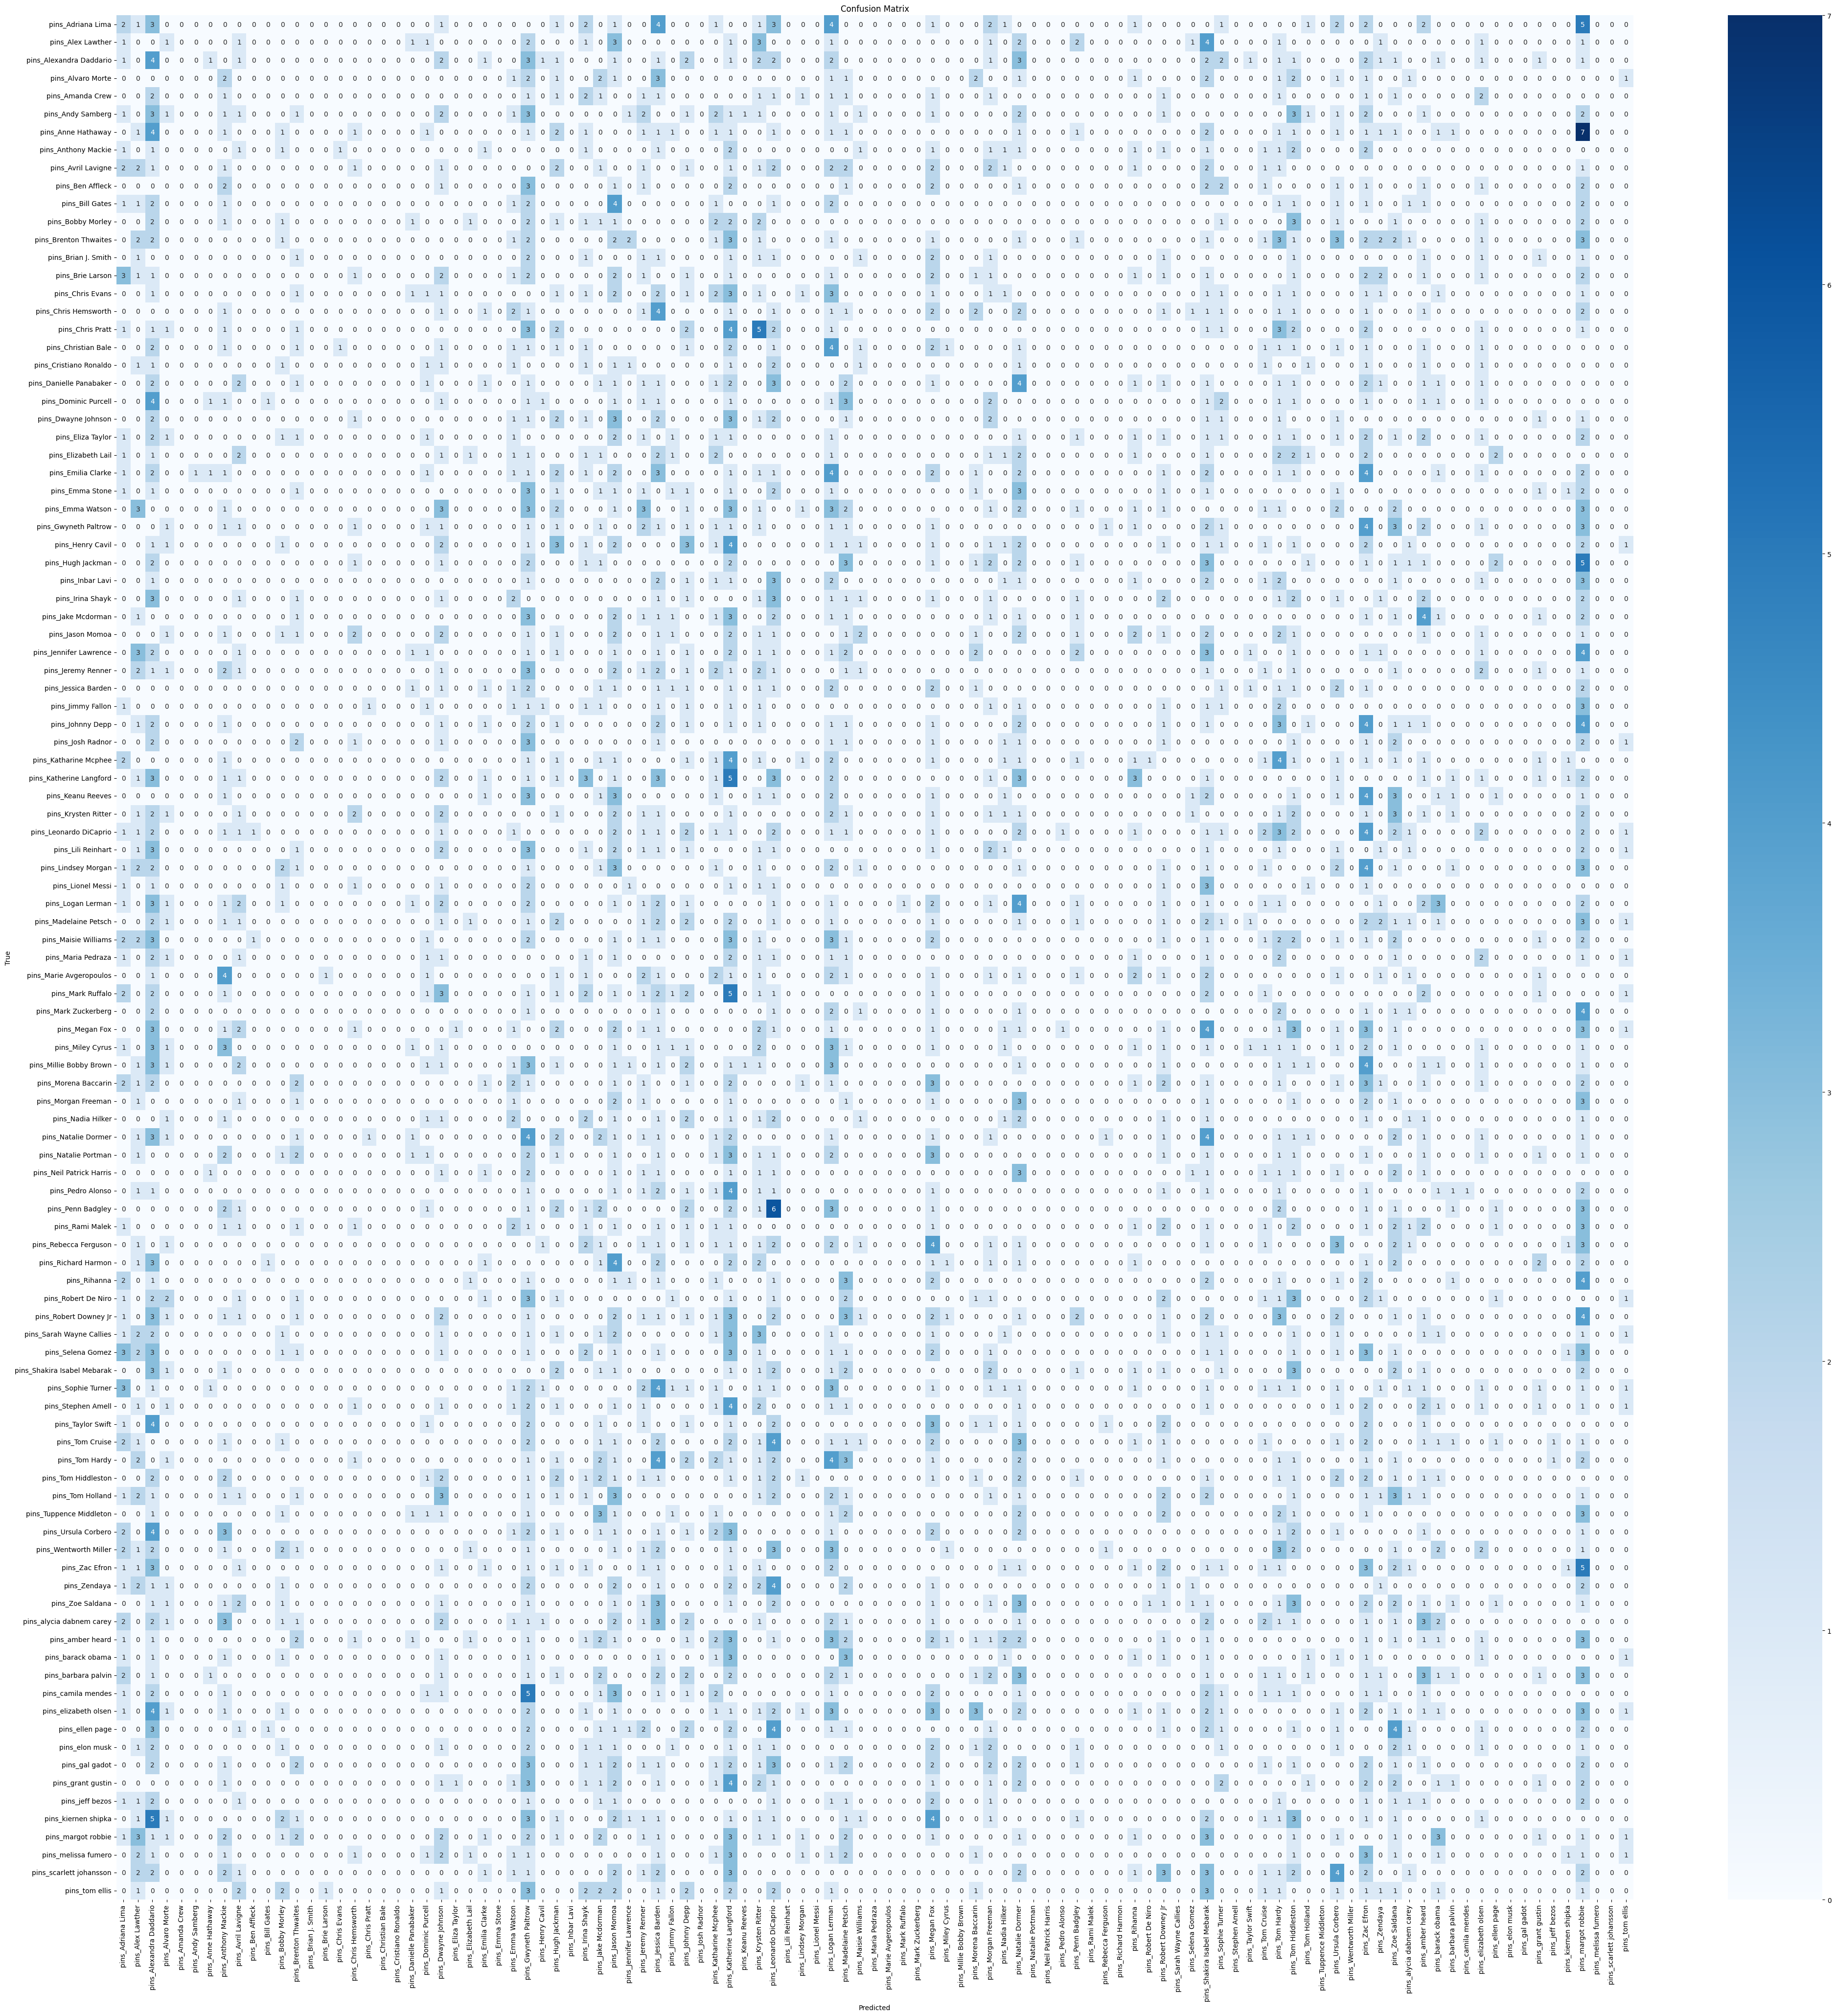

In [18]:
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(50, 50)) 

sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=class_labels, 
    yticklabels=class_labels  
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Training and Validation Loss and Accuracy

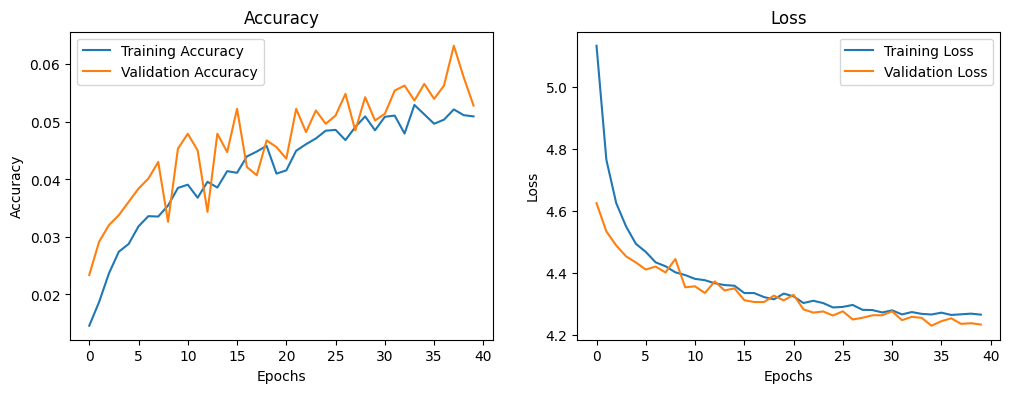

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
